# Programa para bajar vacunas
@walyt

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import itertools

In [2]:
path_data = 'https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv?raw=Tue'

In [3]:
dir = '/Users/mharias/documents/proyectos/covid/vacunacion_paises/'

In [4]:
datos_row = pd.read_csv(path_data)

In [5]:
columnas_interes = ['location', 'date','people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_fully_vaccinated']

In [6]:
lista_paises = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Ireland','Portugal','Italy','Spain','Sweden','United Kingdom',
                'Austria','Finland','World','Chile']

lista_paises_israel = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Portugal','Italy','Spain','Sweden','United Kingdom',
                       'Israel','Chile','Malta','Polonia','Mexico','Brazil','Argentina','Hungary','Finland']
'''lista_paises_israel = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Portugal','Italy','Spain','United Kingdom',
                       'Israel','Chile','Malta','Polonia','Mexico','Brazil','Argentina','Hungary']'''


"lista_paises_israel = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',\n                'France','Portugal','Italy','Spain','United Kingdom',\n                       'Israel','Chile','Malta','Polonia','Mexico','Brazil','Argentina','Hungary']"

In [7]:
datos = datos_row.loc[datos_row['location'].isin(lista_paises_israel),columnas_interes].copy()

In [8]:
fecha_filtro = datetime.today().strftime('%Y-%m-%d')

In [9]:
fecha_filtro = '2021-07-22'

In [10]:
datos = datos[datos['date']==fecha_filtro]

In [11]:
fecha = datetime.strptime(fecha_filtro,'%Y-%m-%d')

In [12]:
f'{fecha:%b, %-d}'

'Jul, 22'

In [13]:
f'{1:,.1f}'

'1.0'

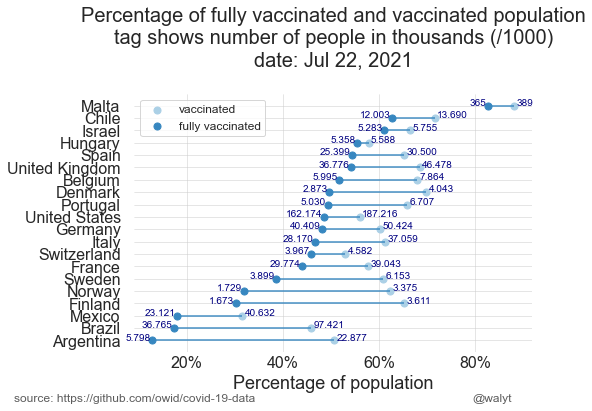

In [14]:
autor='@walyt'
sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = f'Percentage of fully vaccinated and vaccinated population\ntag shows number of people in thousands (/1000)\ndate: {fecha:%b %-d, %Y}\n'

datos=datos.sort_values('people_fully_vaccinated_per_hundred')

colores = sns.color_palette("Blues_r",2)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['people_fully_vaccinated_per_hundred'], xmax=datos['people_vaccinated_per_hundred'], 
          color=colores[0],linewidth=2, alpha=0.7)

ax.scatter(datos['people_vaccinated_per_hundred'], my_range, color=colores[1], alpha=1 ,s=50, label='vaccinated')
ax.scatter(datos['people_fully_vaccinated_per_hundred'], my_range, color=colores[0], alpha=1 ,s=50, label='fully vaccinated')

for linea,i in enumerate(datos.index[::]):
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'people_fully_vaccinated']/1000).replace(',','.'),
            x=datos.loc[i,'people_fully_vaccinated_per_hundred']-.3,
            y=linea+1,
            horizontalalignment='right',
            fontsize=10,
           color='navy')
    
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'people_vaccinated']/1000).replace(',','.'),
            x=datos.loc[i,'people_vaccinated_per_hundred']+.5,
            y=linea+1,
            horizontalalignment='left',
            fontsize=10,
           color='navy')
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v)))
ax.legend(loc='upper left',fontsize=12)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=10)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title(title,fontsize=20)
ax.text(x=0.0, y=-.20, s='source: {}'.format('https://github.com/owid/covid-19-data'),
        fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.9, y=-.20, s=autor , fontsize=12, alpha=0.75,
        ha='center', va='bottom',transform=ax.transAxes)
ax.set_xlabel('Percentage of population',fontsize=18)
plt.yticks(my_range,datos['location'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(dir+'img/suministrada_admin_paises.png',dpi=288,bbox_inches='tight')


In [15]:
datos

,location,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_vaccinated,people_fully_vaccinated
1415,Argentina,2021-07-22,50.62,12.83,22876517.0,5797847.0
4682,Brazil,2021-07-22,45.83,17.30,97420756.0,36765097.0
20674,Mexico,2021-07-22,31.51,17.93,40632434.0,23121276.0
11138,Finland,2021-07-22,65.17,30.19,3611037.0,1672892.0
24293,Norway,2021-07-22,62.25,31.89,3374685.0,1728612.0
31303,Sweden,2021-07-22,60.92,38.61,6152896.0,3899023.0
11349,France,2021-07-22,57.79,44.07,39042816.0,29774321.0
31517,Switzerland,2021-07-22,52.94,45.83,4581595.0,3966784.0
16121,Italy,2021-07-22,61.29,46.59,37058762.0,28170431.0
12114,Germany,2021-07-22,60.18,48.23,50423754.0,40409045.0
